In [1]:
#NEW Apprentice Python Project
#Christian Lancaster
#data from Kaggle reported as World Happiness Report for the year 2021
#Questions for consideration:
#1.) "Where is the happiest place to live" -> is there data that suggests a particular region of the world host a happier populus?
#2.) Of the surveryed metrics do any boast a strong corrilation with percieved happiness, and which are they?
#3.) Of the surveryed metrics do any seem extranious with little tie to ladder score, and why might that be?

#Additonally I would have loved to compare present data against population to expand the generalizations that could be made; however, time permitting we will have to leave that for a latter date

In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

#import a suite of data visulaization and anaylsis tools

csv_path="C:/Users/ich3l/Desktop/DATA ANYLIST BOOT CAMP/world-happiness-report-2021.csv"

#this data came in the form of a CSV file. take steps to import and create a basic data frame to gather information on the data

df=pd.read_csv(csv_path)

df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
#After viewing the original data frame cut it down to metrics that I believe are important to the context of my analysis

dfView1=df[['Country name','Regional indicator','Ladder score','Healthy life expectancy','Logged GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption']]
dfView1.head()

,Country name,Regional indicator,Ladder score,Healthy life expectancy,Logged GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,72.0,10.775,0.954,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,72.7,10.933,0.954,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,74.4,11.117,0.942,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,73.0,10.878,0.983,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,72.4,10.932,0.942,0.913,0.175,0.338


In [4]:
#a basic example of indexing the data frame for a specific entry

indexdfCheck = dfView1['Country name']
indexdfCheck[[3]]

3    Iceland
Name: Country name, dtype: object

In [5]:
#a broader example using pandas' .loc function with index restrictions to view the 5 highest ladder scores

dfView1.loc[0:4,'Ladder score']

0    7.842
1    7.620
2    7.571
3    7.554
4    7.464
Name: Ladder score, dtype: float64

In [6]:
#Example of pandas' head function to show the first 'n' records of the data

dfView1.head(4)

,Country name,Regional indicator,Ladder score,Healthy life expectancy,Logged GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,72.0,10.775,0.954,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,72.7,10.933,0.954,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,74.4,11.117,0.942,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,73.0,10.878,0.983,0.955,0.160,0.673


In [7]:
#Example of pandas' tail function to show the last 'n' records of the data

dfView1.tail(4)

,Country name,Regional indicator,Ladder score,Healthy life expectancy,Logged GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
145,Botswana,Sub-Saharan Africa,3.467,59.269,9.782,0.784,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,61.400,7.676,0.552,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,56.201,7.943,0.750,0.677,-0.047,0.821
148,Afghanistan,South Asia,2.523,52.493,7.695,0.463,0.382,-0.102,0.924


In [8]:
#Additional splicing highlighting a strong relationship with ladder score, life expectancy, and regional bias

dfView1.loc[0:4,'Country name':'Healthy life expectancy']

,Country name,Regional indicator,Ladder score,Healthy life expectancy
0,Finland,Western Europe,7.842,72.0
1,Denmark,Western Europe,7.620,72.7
2,Switzerland,Western Europe,7.571,74.4
3,Iceland,Western Europe,7.554,73.0
4,Netherlands,Western Europe,7.464,72.4


In [9]:
#to further investigate potential correlations viewing data with a ladder score of above 7. Initial thoughts suggest a tight grouping of GDP, Life expectancy, Social support, and Freedom to make life choices
#additonally suggest strong regional bias for Western Europe

dfView1.loc[dfView1['Ladder score'] > 7]

,Country name,Regional indicator,Ladder score,Healthy life expectancy,Logged GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,72.000,10.775,0.954,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,72.700,10.933,0.954,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,74.400,11.117,0.942,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,73.000,10.878,0.983,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,72.400,10.932,0.942,0.913,0.175,0.338
5,Norway,Western Europe,7.392,73.300,11.053,0.954,0.960,0.093,0.270
6,Sweden,Western Europe,7.363,72.700,10.867,0.934,0.945,0.086,0.237
7,Luxembourg,Western Europe,7.324,72.600,11.647,0.908,0.907,-0.034,0.386
8,New Zealand,North America and ANZ,7.277,73.400,10.643,0.948,0.929,0.134,0.242
9,Austria,Western Europe,7.268,73.300,10.906,0.934,0.908,0.042,0.481


In [10]:
#To understand just how tight this grouping was I used pandas' describe function to check a variety of statistics for the data.
#this revealed that nearly all metrics previously mentioned were within the top 75% quartile for all ladderscores above 7 -> strongly suggesting a correlation

dfView1.describe()

,Ladder score,Healthy life expectancy,Logged GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,64.992799,9.432208,0.814745,0.791597,-0.015134,0.727450
std,1.073924,6.762043,1.158601,0.114889,0.113332,0.150657,0.179226
min,2.523000,48.478000,6.635000,0.463000,0.382000,-0.288000,0.082000
25%,4.852000,59.802000,8.541000,0.750000,0.718000,-0.126000,0.667000
50%,5.534000,66.603000,9.569000,0.832000,0.804000,-0.036000,0.781000
75%,6.255000,69.600000,10.421000,0.905000,0.877000,0.079000,0.845000
max,7.842000,76.953000,11.647000,0.983000,0.970000,0.542000,0.939000


In [11]:
#basic example of grouping the data frame to inspect regional tendancies

dfView1.groupby(['Regional indicator']).mean()

,Ladder score,Healthy life expectancy,Logged GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
Regional indicator,,,,,,,
Central and Eastern Europe,5.984765,68.338412,10.109059,0.887412,0.797059,-0.078941,0.850529
Commonwealth of Independent States,5.467000,65.009500,9.401833,0.872500,0.816917,-0.036000,0.725083
East Asia,5.810333,71.252167,10.367667,0.860500,0.763500,-0.062333,0.683333
Latin America and Caribbean,5.908050,67.076050,9.370000,0.839500,0.831750,-0.067700,0.792600
Middle East and North Africa,5.219765,65.609118,9.666118,0.797647,0.716471,-0.079765,0.762235
North America and ANZ,7.128500,72.325000,10.809500,0.933500,0.898750,0.120000,0.449250
South Asia,4.441857,62.681000,8.682571,0.703429,0.765000,0.042714,0.797429
Southeast Asia,5.407556,64.888444,9.421444,0.820333,0.909000,0.156333,0.709111
Sub-Saharan Africa,4.494472,55.886472,8.075194,0.696750,0.723194,0.013444,0.765944


In [12]:
#sorting the grouped view for easier inspection reveals that surprisingly Western Europe is not the highest cluster, but still supports that it is one of the highest
#the two major differences separating the top regions are "gererosity" and "perceptions of corruption"
#this suggests that while the previously dictated metrics provide an incredible baseline, once all of them are saciated to an acceptable level, additional metrics are needed to distinguish potential happiness

regionSortdf = dfView1.groupby(['Regional indicator']).mean()
regionSortdf.sort_values(['Ladder score'], ascending = False)

,Ladder score,Healthy life expectancy,Logged GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
Regional indicator,,,,,,,
North America and ANZ,7.128500,72.325000,10.809500,0.933500,0.898750,0.120000,0.449250
Western Europe,6.914905,73.033095,10.822714,0.914476,0.858714,-0.003190,0.523095
Central and Eastern Europe,5.984765,68.338412,10.109059,0.887412,0.797059,-0.078941,0.850529
Latin America and Caribbean,5.908050,67.076050,9.370000,0.839500,0.831750,-0.067700,0.792600
East Asia,5.810333,71.252167,10.367667,0.860500,0.763500,-0.062333,0.683333
Commonwealth of Independent States,5.467000,65.009500,9.401833,0.872500,0.816917,-0.036000,0.725083
Southeast Asia,5.407556,64.888444,9.421444,0.820333,0.909000,0.156333,0.709111
Middle East and North Africa,5.219765,65.609118,9.666118,0.797647,0.716471,-0.079765,0.762235
Sub-Saharan Africa,4.494472,55.886472,8.075194,0.696750,0.723194,0.013444,0.765944


<AxesSubplot:xlabel='Regional indicator'>

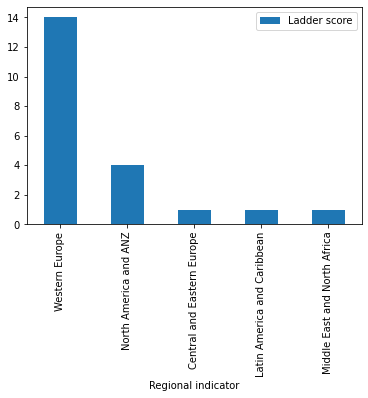

In [13]:
#basic graphic illustration displaying the top 21 happiest nations
#further establishes our top two regions, and Western Europes grasp on the top spots

(dfView1.loc[0:20,'Regional indicator':'Ladder score'].groupby('Regional indicator').count().sort_values(by = 'Ladder score', ascending = False)).plot.bar()

In [14]:
#sorted view shows a closer look at healthy life expectancy(HLE) (expected to have very high ladder scores); however only one of the top 5 nations for HLE has a ladder score in the top quartile
#suggests, as previously mentioned that as basic needs for survival are met additional metrics are needed to evaluate general happiness

dfViewSort = dfView1.sort_values(by = 'Healthy life expectancy', ascending = False)
dfViewSort.head()

,Country name,Regional indicator,Ladder score,Healthy life expectancy,Logged GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
31,Singapore,Southeast Asia,6.377,76.953,11.488,0.915,0.927,-0.018,0.082
76,Hong Kong S.A.R. of China,East Asia,5.477,76.820,11.000,0.836,0.717,0.067,0.403
55,Japan,East Asia,5.940,75.100,10.611,0.884,0.796,-0.258,0.638
26,Spain,Western Europe,6.491,74.700,10.571,0.932,0.761,-0.081,0.745
2,Switzerland,Western Europe,7.571,74.400,11.117,0.942,0.919,0.025,0.292


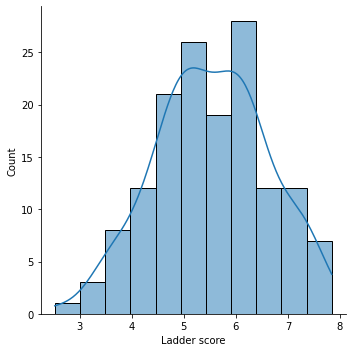

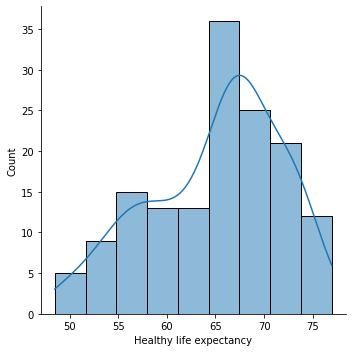

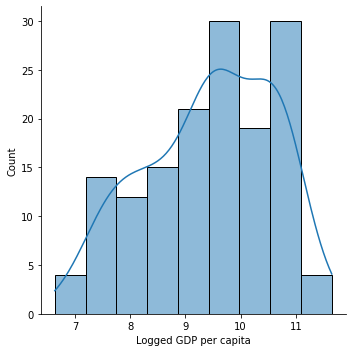

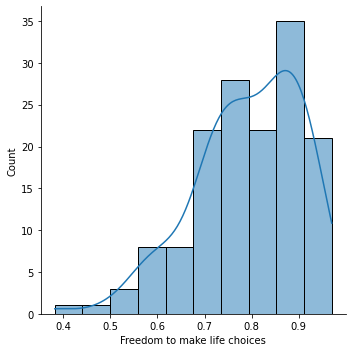

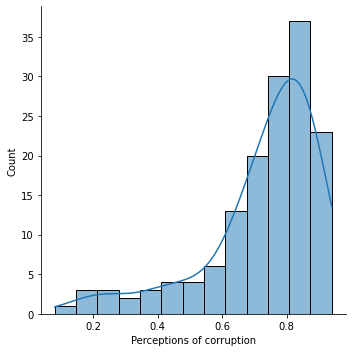

In [15]:
#using seaborn's disribution plot function to view data's gaussian distribution
#as expected ladder score presents a fairly regular distribution

#nearly all of the other metrics in question show a leftward skew
#in GDP, HLE, and Freedom this kind of skew can be expected as globalization accelerates the world toward a more equitable state
#but the skew present in 'perceptions of corruption' directly counters this sentiment which I find incredibly puzzling; as it suggests that a majority of nations have ill intentions at heart
#this will need additonal exploration...

for col in dfView1[['Ladder score','Healthy life expectancy','Logged GDP per capita','Freedom to make life choices','Perceptions of corruption']]:
    if dfView1[col].dtype != "object":
        sns.displot(dfView1[col],kde = True)

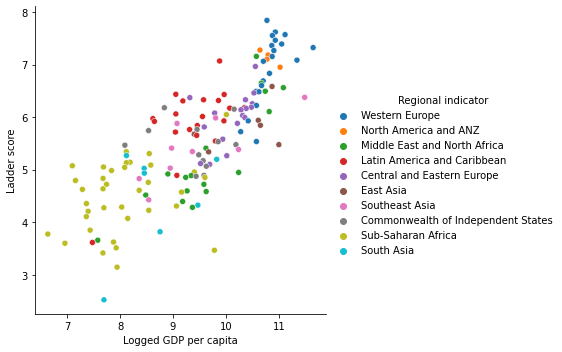

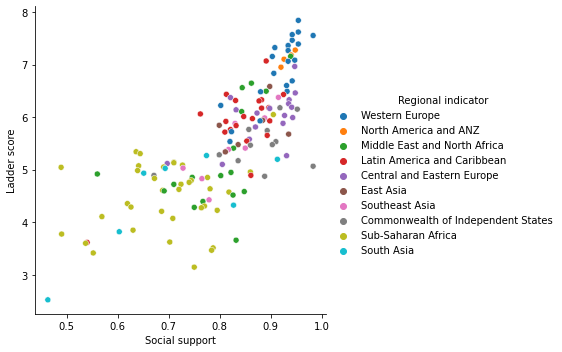

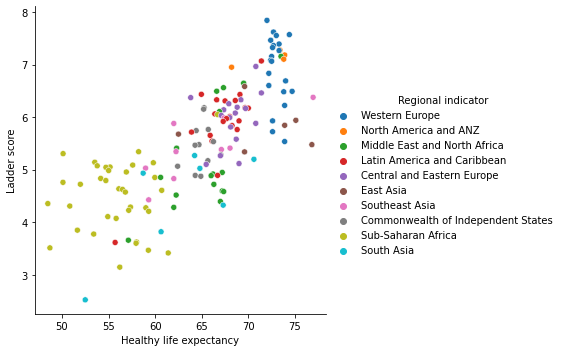

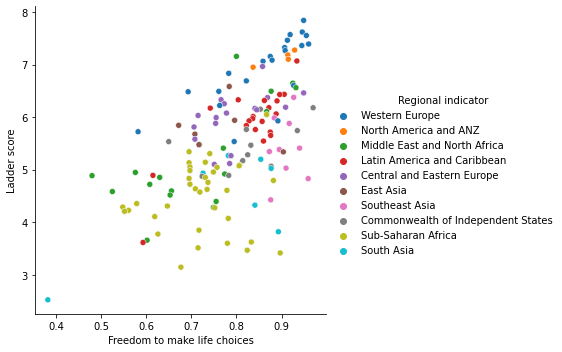

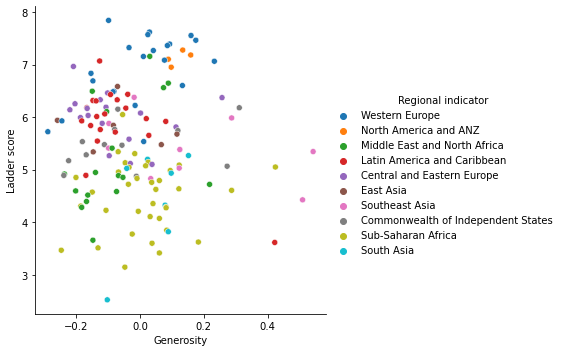

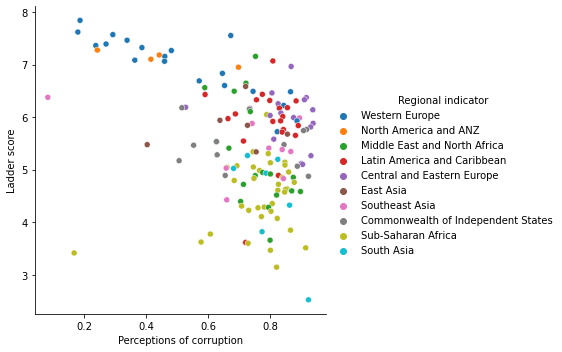

In [16]:
#using seaborn's replot to create scatter plots of the regionally grouped view to show correlation to Ladder score

#expected strong correlation in GDP, HLE, Social support, and freedom
#results are fairly consistent with expections; with some spread in Freedom to make life choices(suggesting a weaker correlation)

#puzzling results show that perceptions of 'generosity' had nearly no relavency to the data; and a weak, inverse correlation from perceptions of corruption

for col in dfView1[['Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity','Perceptions of corruption']]:
    sns.relplot(data = dfView1[dfView1['Regional indicator'].isin(dfView1.groupby('Regional indicator').mean().sort_values(by = 'Ladder score', ascending = False).index)], x= col, y="Ladder score", hue="Regional indicator")

In [17]:
#creating an additonal view exluding string values to use in a seaborn heat map

corrdfView = dfView1[['Ladder score','Healthy life expectancy','Logged GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption']]

Text(0.5, 1.0, 'Correlation Heatmap')

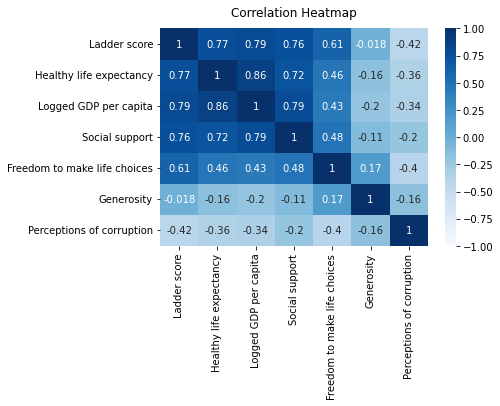

In [18]:
#correlation heat map confirms the majority of our speculations to this point.
#the 4 metrics for HLE, GDP, social support, and freedom are all fairly strong in correlation
#generosity shows almost no relevance
#perceptions of corruption is also fairly weak, but does show some relationship to ladder score and percieved freedom.

heatmap = sns.heatmap(corrdfView.corr(),vmin=-1,vmax=1,cmap='Blues',annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)